<a href="https://colab.research.google.com/github/marekpiotradamczyk/ml_uwr_23/blob/main/Assignments/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 6

**Submission deadline:**
* **lab session in the week 15-19.1.24**

**Points: 3 points**


In [1]:
# Standard IPython notebook imports
%matplotlib inline

import os
from io import StringIO

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sstats
import seaborn as sns
import sklearn.tree
from tqdm import tqdm_notebook




In [2]:
# @title Data Loading
# We will load a few commonly used datasets:
# - mushroom


# Mushroom dataset
# https://archive.ics.uci.edu/ml/datasets/mushroom
columns = [
    "target",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises?",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat",
]

# Use read_csv to load the data.
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
mushroom_df = pd.read_csv(url, header=None, names=columns)
mushroom_idx_df = mushroom_df.reset_index()


In [3]:
mushroom_df.head()

,target,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Problem 1: Entropy [3p] 


### Implement entropy [1p]

Implement the function `entropy` to compute the entropy of a column of the dataset.

The [entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)) of a discrete variable is defined to be:

$$H(X) = -\sum_x p_X(x) \log_2 p_X(x).$$

A good in tutorial is given by Chris Olah: https://colah.github.io/posts/2015-09-Visual-Information/.


When $X$ is a discrete random variable, we can estimate the probabilities with counts:

$$p_X(x) = \frac{\text{number of instances where }X=x}{\text{total number of instances}}.$$


Hint: the following `pandas` functions may be useful:
- `count`
- `value_counts`

Then use the dataframe's `apply` function to compute the entropy of all columns.

In [4]:
def entropy(y):
    #y is pandas.Series
        #TODO put your code here
    return entropy

mushroom_df.apply(entropy, axis=0)

target                      0.999068
cap-shape                   1.652889
cap-surface                 1.575486
cap-color                   2.510143
bruises?                    0.979327
odor                        2.319414
gill-attachment             0.173129
gill-spacing                0.637878
gill-size                   0.892256
gill-color                  3.030433
stalk-shape                 0.986927
stalk-root                  1.822922
stalk-surface-above-ring    1.221348
stalk-surface-below-ring    1.399135
stalk-color-above-ring      1.936809
stalk-color-below-ring      1.978163
veil-type                  -0.000000
veil-color                  0.196238
ring-number                 0.420680
ring-type                   1.535121
spore-print-color           2.203227
population                  2.003398
habitat                     2.274747
dtype: float64

### Conditional Entropy [1p]

Consider the following dataset:

In [5]:
num_rows=10000
x1 = np.random.randint(0, 2, size=num_rows)
x2 = np.random.randint(0, 2, size=num_rows)

# y is equal to x2
y = x2.copy()

# Generating x3 based on specified probabilities
x3 = np.array([np.random.choice([0, 1], p=[0.1, 0.9]) if y_i == 1 else np.random.choice([0, 1], p=[0.9, 0.1]) for y_i in y])

# Creating the DataFrame
bits_df = pd.DataFrame({'x1': x1, 'x2': x2, 'x3': x3, 'y': y, })
bits_df.head(10)

,x1,x2,x3,y
0,1,1,1,1
1,0,1,1,1
2,0,1,1,1
3,0,1,1,1
4,0,1,1,1
5,0,0,0,0
6,0,1,1,1
7,0,1,1,1
8,1,0,0,0
9,0,1,1,1


When you look at each column $c$ separately, then every single cell at row $r$ of it has a random bit where $\mathcal{P}[x^{(c)}_r = 0] = \mathcal{P}[x^{(c)}_r = 1] = 0.5$. Hence entropy of each column is roughly 1:

In [6]:
bits_df.apply(entropy)

x1    0.999972
x2    0.999963
x3    0.999990
y     0.999963
dtype: float64

However, $x1$ is independent of $y$, while $x2$ is equal to $y$. Since entropy measures information, we should be able to say that when we know the value of $y$ --- and more precisely $y_i$ ---, then we have no additional information about $x1$ and we have full information about $x2$. And additionally we should be able to move smoothly between this spectrum by saying that there is some partial information about $x3$, since $x3$ is created conditionally given $y$.
And this is where the notion of conditional entropy naturally comes.

**Task:** Implement the conditional entropy computation

$$H(X|Y) = \sum_y p_Y(y) H(X|y) = \sum_y p_Y(y) \sum_x p_X(x|y) \log_2 p_X(x|y)$$




In [7]:
def conditional_entropy(x, y):
        #TODO put your code here
    return conditional_entropy

In [8]:
for c in ['x1','x2','x3']:
    print(c, conditional_entropy(bits_df[c], bits_df['y']).round(4))

x1 0.9998
x2 -0.0
x3 0.4629


## Mutual Information [1p]

Entropy can be applied on vector random variables. It means that if we have have two random variables $X$ and $Y$ both with values from $\mathcal{R}$, we can consider a two dimensional variable $(X,Y)$ values of which belong to $\mathbb{R}^2$. Beautiful thing about entropy is that the formula for calculating entropy of $(X,Y)$ is exactly the same. More precisely:

$$p_{(X,Y)}(x, y) = \frac{\text{number of instances where }(X,Y)=(x,y)}{\text{total number of instances}}.$$


And once we know it, we can introduce the notion of Mututal Information which is defined as $H(X,Y) - H(X|Y) - H(Y|X)$.

In [9]:
def mutual_information(X, Y):
        #TODO implement mutual information using the formula H(X,Y) - H(X|Y) - H(Y|X)
    return mut_info

Complementary to conditional entropy, we can measure how much information is in both column, i.e., random variables:

In [10]:
for c in ['x1','x2','x3']:
    print(c, mutual_information(bits_df[c], bits_df['y']).round(4))

x1 0.0002
x2 1.0
x3 0.5371


Makes sense.

## Mutual information and classification

In [11]:
mutinfsort = []
for cname in mushroom_df.columns:
    mutinfsort.append( (mutual_information(mushroom_df['target'], mushroom_df[cname]), cname))
    print(f"{cname.ljust(25)}:\t {mutual_information(mushroom_df['target'], mushroom_df[cname]).round(decimals=3)}")

target                   :	 0.999
cap-shape                :	 0.049
cap-surface              :	 0.029
cap-color                :	 0.036
bruises?                 :	 0.192
odor                     :	 0.906
gill-attachment          :	 0.014
gill-spacing             :	 0.101
gill-size                :	 0.23
gill-color               :	 0.417
stalk-shape              :	 0.008
stalk-root               :	 0.135
stalk-surface-above-ring :	 0.285
stalk-surface-below-ring :	 0.272
stalk-color-above-ring   :	 0.254
stalk-color-below-ring   :	 0.241
veil-type                :	 0.0
veil-color               :	 0.024
ring-number              :	 0.038
ring-type                :	 0.318
spore-print-color        :	 0.481
population               :	 0.202
habitat                  :	 0.157


We can see from the above listing that the features that share the most information with the target are "odor" (0.906), "spore-print-color" (0.481), and "gill-color" (0.417). This already can indicate which columns have the biggest potential for being useful in classification:

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming mushroom_df is your DataFrame
# Convert categorical variables using label encoding
label_encoder = LabelEncoder()
mushroom_df_encoded = mushroom_df.apply(label_encoder.fit_transform)

mutinfsort.sort()
for mutinf, column in mutinfsort:
    # Split the dataset into a feature and target variable
    X = mushroom_df_encoded[[column]] #ONLY ONE COLUMN IS USED IN THE TRAINING
    y = mushroom_df_encoded['target']
    
    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Creating and training the Decision Tree classifier
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = classifier.predict(X_test)
    
    # Calculating the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{column.ljust(24)} accuracy: {str(accuracy.round(3)).ljust(6)}vs mut-inf: {mutinf.round(3)}')
    


veil-type                accuracy: 0.519 vs mut-inf: 0.0
stalk-shape              accuracy: 0.559 vs mut-inf: 0.008
gill-attachment          accuracy: 0.519 vs mut-inf: 0.014
veil-color               accuracy: 0.519 vs mut-inf: 0.024
cap-surface              accuracy: 0.578 vs mut-inf: 0.029
cap-color                accuracy: 0.597 vs mut-inf: 0.036
ring-number              accuracy: 0.53  vs mut-inf: 0.038
cap-shape                accuracy: 0.561 vs mut-inf: 0.049
gill-spacing             accuracy: 0.62  vs mut-inf: 0.101
stalk-root               accuracy: 0.645 vs mut-inf: 0.135
habitat                  accuracy: 0.675 vs mut-inf: 0.157
bruises?                 accuracy: 0.737 vs mut-inf: 0.192
population               accuracy: 0.713 vs mut-inf: 0.202
gill-size                accuracy: 0.741 vs mut-inf: 0.23
stalk-color-below-ring   accuracy: 0.706 vs mut-inf: 0.241
stalk-color-above-ring   accuracy: 0.716 vs mut-inf: 0.254
stalk-surface-below-ring accuracy: 0.758 vs mut-inf: 0.272


Just as expected.

## Correlation vs mutual information

Have a look here:

In [13]:
bits_df.corr()

,x1,x2,x3,y
x1,1.000000,-0.016956,-0.021177,-0.016956
x2,-0.016956,1.000000,0.803799,1.000000
x3,-0.021177,0.803799,1.000000,0.803799
y,-0.016956,1.000000,0.803799,1.000000


The above correlation matrix makes sense:
- $x1$ and $y$ are independent, hence correlation is 0
- $x2$ and $y$ are identical, hence correlation is 1
- $x3$ depends heavily on $y$, hence correlation is high and $\approx 0.8$

However, correlation sometimes doesn't cut it.
There are very natural cases when correlation of two random variables is very low (in the example below it's actually a perfect 0), even though they may be incredibly dependent. It turns out that zero correlation only tells us whether two random variables do not have any linear relationship between them.

,x,|x|
-1.0,-1.0,1.0
0.0,0.0,0.0
1.0,1.0,1.0


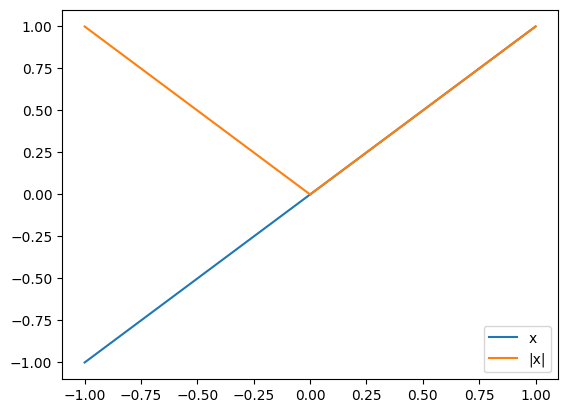

In [14]:
df = pd.DataFrame(index=np.linspace(-1,1,3))
df['x'] = df.index
df['|x|'] = np.abs(df['x'])
df.plot()
df

Correlation (and covariance) of random variables X and |X| is 0.

In [21]:
df['x'].dot(df['|x|'])

0.0

However, they are very dependent, since knowing $x$ immediately tells us what the value of $|x|$ is. 
And this actually can be seen by looking at the conditional entropy of $H(|X|\ | X)$ the variables.

In [22]:
conditional_entropy(df["|x|"], df["x"]).round(decimals=9)

-0.0

The above result clearly implements our intuition --- once we know $x$, there's no uncertainty left about $|x|$.

What about the reverse conditioning?

In [23]:
entropy(df['x']).round(5), np.log2(3).round(5)

(1.58496, 1.58496)

In [24]:
entropy(df['|x|']).round(5), ((1/3)*np.log2(3) + (2/3)*np.log2(3/2)).round(5)

(0.9183, 0.9183)

In [25]:
conditional_entropy(df["x"], df["|x|"]).round(5)

0.66667

This result has a natural intepretation: 1 cases out of 3 the $|x|$ is zero in which case we know what $x$ is, so in this case the entropy is $0$, cause there's no uncertainty left. 2 cases out of 3 we have $|x| = 1$, in which case the uncertainty which remains is the probability distribution of the sign. The probability distribution of the sign is just $P(\mbox{sign is }+) = 1/2 = P(\mbox{sign is }-)$ and its entropy is $-\left(\frac{1}{2}\log(1/2) + \frac{1}{2}\log(1/2)\right)=1$. Hence the total conditional entropy is $\frac{2}{3}$.

At the end let us look at the actual mutual information based on what we already saw.

In [26]:
mutual_information(df['x'], df['|x|']).round(5), ((1/3)*np.log2(3) + (2/3)*np.log2(3/2)).round(5)

(0.9183, 0.9183)

Makes sense, right?